Loop functions: 100%|████████████████████████████| 2/2 [00:05<00:00,  3.03s/it]


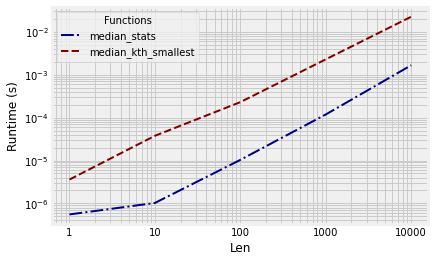

In [1]:
from statistics import median
from heapq import heapify
from random import randint
import numpy as np
import benchit

def median_stats(arr):
    return median(arr)

def median_kth_smallest(arr):
    n = len(arr)
    k = n // 2 + 1
    return kthSmallest(arr, 0, n - 1, k)


def kthSmallest(arr, l, r, k):  
      
    # If k is smaller than number of  
    # elements in array  
    if (k > 0 and k <= r - l + 1):  
          
        # Number of elements in arr[l..r]  
        n = r - l + 1
  
        # Divide arr[] in groups of size 5,  
        # calculate median of every group 
        # and store it in median[] array.  
        median = [] 
  
        i = 0
        while (i < n // 5): 
            median.append(findMedian(arr, l + i * 5, 5)) 
            i += 1
  
        # For last group with less than 5 elements  
        if (i * 5 < n): 
            median.append(findMedian(arr, l + i * 5,  
                                              n % 5)) 
            i += 1
  
        # Find median of all medians using recursive call.  
        # If median[] has only one element, then no need  
        # of recursive call 
        if i == 1: 
            medOfMed = median[i - 1] 
        else: 
            medOfMed = kthSmallest(median, 0,  
                                   i - 1, i // 2) 
  
        # Partition the array around a medOfMed 
        # element and get position of pivot  
        # element in sorted array  
        pos = partition(arr, l, r, medOfMed) 
  
        # If position is same as k  
        if (pos - l == k - 1):  
            return arr[pos]  
        if (pos - l > k - 1): # If position is more,  
                              # recur for left subarray  
            return kthSmallest(arr, l, pos - 1, k)  
  
        # Else recur for right subarray  
        return kthSmallest(arr, pos + 1, r,  k - pos + l - 1)  
  
    # If k is more than the number of  
    # elements in the array  
    return 999999999999
  
def swap(arr, a, b):  
    temp = arr[a]  
    arr[a] = arr[b]  
    arr[b] = temp  
  
# It searches for x in arr[l..r],   
# and partitions the array around x.  
def partition(arr, l, r, x): 
    for i in range(l, r): 
        if arr[i] == x: 
            swap(arr, r, i) 
            break
  
    x = arr[r]  
    i = l  
    for j in range(l, r):  
        if (arr[j] <= x):  
            swap(arr, i, j)  
            i += 1
    swap(arr, i, r)  
    return i  
  
# median of arr[] from index l to l+n 
def findMedian(arr, l, n): 
    lis = [] 
    for i in range(l, l + n): 
        lis.append(arr[i]) 
          
    # Sort the array  
    lis.sort() 
  
    # Return the middle element 
    return lis[n // 2] 

funcs = [median_stats, median_kth_smallest]
inputs = [[randint(0, 1000000) for _ in range(i)] for i in 10**np.arange(5)]

t = benchit.timings(funcs, inputs)
t.plot(logy=True, logx=True)